##   Problem Definition
Goal: Predict whether a customer will churn (leave the service) based on their profile and service usage.


# 1. Importing  Basic libraries like:
pandas,numpy,seaborn,matplotlib

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




### For handling class imbalance
from imblearn.over_sampling import SMOTE,

Libraries for Preprocessing and model building 

### pip install imbalanced-learn,

from imblearn.over_sampling import SMOTE


#### from imblearn.over_sampling import SMOTE
## What is SMOTE?
SMOTE stands for Synthetic Minority Over-sampling Technique.

It helps balance the dataset by creating synthetic samples of the minority class (in our case, Churn = Yes) instead of just duplicating rows.
When to Use SMOTE:
After encoding and scaling

Only on training data (not test data!)

Best used with models like Logistic Regression, Random Forest, etc.

### train_test_split:
Splits your data into training and testing sets
### cross_val_score:	
Performs cross-validation to test model robustness
### Use of DecisionTreeClassifier:
To build a model that splits decisions based on feature values
#### Metric,	Tells You...,	When to Use:
accuracy_score	,Overall correctness	,Balanced datasets

confusion_matrix,	Detailed error types (FP, FN, etc.),	Any classification

classification_report,	(Precision, Recall, F1 per class),	Imbalanced datasets like churn

In [109]:
# For encoding categorical columns
from sklearn.preprocessing import LabelEncoder

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For splitting data & validating model
from sklearn.model_selection import train_test_split, cross_val_score

# For training models
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For saving/loading trained model
import pickle


# 2. Data Loading and Understanding

In [110]:
#load Telco csv data to pandas Dataframe
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [111]:
df.shape

(7043, 21)

In [112]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [113]:
pd.set_option("display.max_columns",None) 
# Show all columns in output

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
#dropping column customer iD this is not required for churn model,


# Why is customerID not required?
# Because it is just an identifier, not a feature that influences churn.
df =df.drop(columns=["customerID"])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [116]:
# printing the unique values in all columns

numerical_feature_list = ["tenure", "MonthlyCharges", "TotalCharges"] #used this because we don't want amy numerical value there but only categorical value
for col in df.columns:
    if col not in numerical_feature_list:
        print(col,df[col].unique())
        print("-"*50)#It prints a horizontal line of 50 dashes:
# printing the unique values in all columns but manuaally
# print(df["gender"].unique())     can type for all but might be time consuming so we used for loop
    

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [133]:
#converting object type data of total charges to int or float64
df["TotalCharges"] = df["TotalCharges"].astype(float) #will give error 

In [134]:
# so to avoid error we will do
df[df["TotalCharges"]==" "]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [127]:
# len(df[df["TotalCharges"]==" "]) #or  # Or df["TotalCharges"].eq(" ").sum() # Check how many blank values exist

In [128]:
# df["TotalCharges"].replace({" ","0.0"}) # will depricated so use: # Replace blanks with NaN first (cleaner than replacing with 0)
# df["TotalCharges"]=df["TotalCharges"].replace(" ", pd.NA)
# Check which values are causing the issue


In [135]:
#step1 
# List all unique problematic values in the column
invalid_values = df[~df["TotalCharges"].astype(str).str.replace('.', '', 1).str.isdigit()]
print("Invalid TotalCharges rows:")
print(invalid_values["TotalCharges"].unique())


Invalid TotalCharges rows:
[]


##  3.  Cleaning of data

In [136]:
#Step 2: Remove Only Invalid Entries
# Clean and convert safely .Ensured all values are strings (even if they were NaN or numbers).
# .str.strip() removes any spaces like " 45.6 " → "45.6".


df["TotalCharges"] = df["TotalCharges"].astype(str).str.strip()

# Remove known invalid patterns
df = df[~df["TotalCharges"].isin(["", " ", "<NA>", "nan", "NaN"])]

# Now convert to float safely
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Reset index to keep things clean
df.reset_index(drop=True, inplace=True)

# Final check
print("✅ Cleaned! Data type:", df["TotalCharges"].dtype)


✅ Cleaned! Data type: float64


In [137]:
# Keep only rows where TotalCharges is numeric
df = df[df["TotalCharges"].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df["TotalCharges"] = df["TotalCharges"].astype(float)


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### Distribution of target column:

Churn column (whether a customer has left or stayed)

In [141]:
#checking the distribution of target column

print(df["Churn"].value_counts())   #Run this to see how many customers churned vs. stayed:

Churn
No     5163
Yes    1869
Name: count, dtype: int64


# Insights:-
1. Customer ID rempved as it is not required for modelling.
2. No missing values in the dataset.
3. Missing values in TotalCharges column were replaced with 0
4. class imbalance identified in the target. this imbalance will be handled using techniques like SMOTE during model training.

#### Class imbalance becomes critical when we move to the Modeling phase.

## Here's how:
Problem: If you train a model without handling imbalance, it may predict mostly 'No' (majority class), and still get high accuracy — but it'll fail to detect churners.


#### solution:Apply techniques like:

SMOTE (Synthetic Minority Oversampling Technique) from imblearn

Adjusting class weights in classifiers

Undersampling the majority class (less common)




# 3.Exploratory Data Analysis (EDA):-


In [142]:
df.shape

(7032, 20)

In [144]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [146]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [147]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [148]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [149]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 ## Numerical Feature Analysis:
understand the distribution of Numerical features

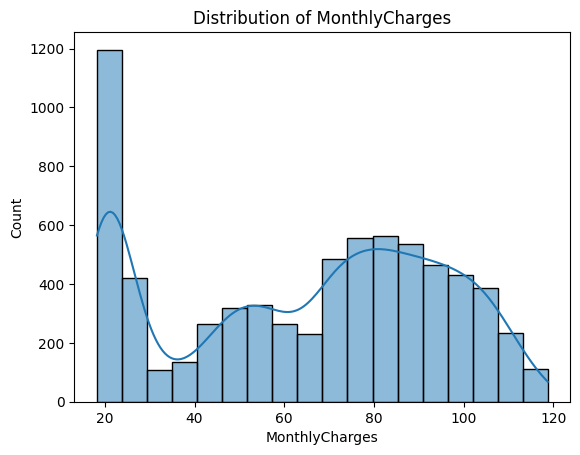

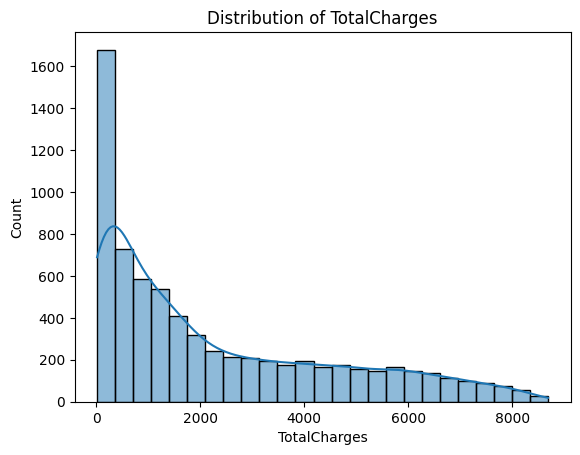

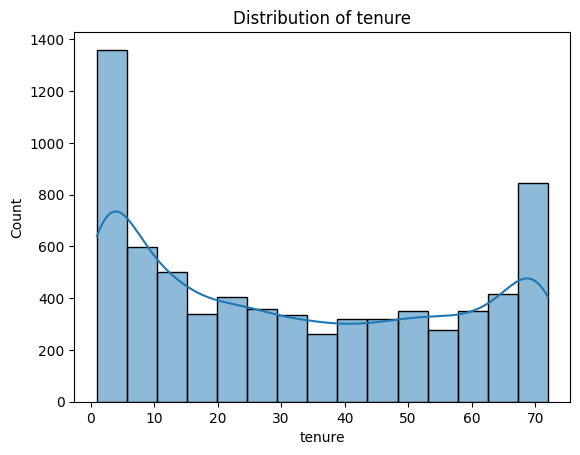

In [158]:
def plot_histogram(df,column_name):
    sns.histplot(df[column_name],kde=True)
    plt.title(f"Distribution of {column_name}")

    # #calculate mean and median values for the columns:
    # col_mean=df[column_mean].mean()
    # col_median=df[column_median].median()

    # #add vwertical lines fro mean and median
    # plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
    # plt.axvline(col_median,color="red",linestyle="--",label="Median")
    # plt.legend()


    
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.show()
plot_histogram(df, "MonthlyCharges")
plot_histogram(df, "TotalCharges")
plot_histogram(df, "tenure")
